#### In this tutorial we are going to explore the usage of cross validation and tuning techniques

In [1]:
# loading the breast cancer dataset
from sklearn import datasets

In [2]:
!pip install HyperclassifierSearch 

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for HyperclassifierSearch: filename=HyperclassifierSearch-1.0-py3-none-any.whl size=3844 sha256=09b466095b761ad1f80ebe30d1f1bbdad522e1c14067708d967a93032faabce5
  Stored in directory: c:\users\demo_account\appdata\local\pip\cache\wheels\73\69\b5\908ab6fca8d0b134250cff401f60485ed781003ffd654889fb
Successfully built HyperclassifierSearch


In [2]:
cancer_data = datasets.load_breast_cancer()

In [3]:
ft_names = cancer_data.feature_names

In [72]:
print("feature names:", ft_names)

feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
input_data = cancer_data.data

In [74]:
input_data.shape

(569, 30)

In [5]:
output_data = cancer_data.target

In [76]:
output_data.shape

(569,)

## 2. Train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.3, random_state=142,stratify=output_data)

In [78]:
X_train.shape

(398, 30)

In [79]:
X_test.shape

(171, 30)

In [80]:
import numpy as np
np.unique(y_train)

array([0, 1])

In [27]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([148, 250], dtype=int64))

In [28]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 64, 107], dtype=int64))

# 3. The traditional way to do cross validation

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import pandas as pd
models = [
RandomForestClassifier(n_estimators=200),
SVC(kernel="linear"),
GaussianNB(),
LogisticRegression(solver='liblinear')] # solver='Lbfgs',
CV = 5
# 
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
cv_df = pd.DataFrame(index=range(CV * len(models))) # Lưu kết quả acc của 4 model, mỗi model 5 entries
entries = [] # entries to save model name and avg performance
for model in models: # duyệt từng model trong ds model.
    model_name = type(model).__name__
    accuracies = cross_val_score (model, X_train, y_train, scoring='accuracy', cv=CV) 
    print(accuracies)
    entries.append([model_name, accuracies.mean()])
cv_df = pd.DataFrame (entries, columns=['model_name', 'accuracy'])

[0.9625     0.9875     0.9125     0.98734177 1.        ]
[0.95       0.9375     0.9625     0.96202532 1.        ]
[0.9125     0.975      0.9125     0.94936709 0.94936709]
[0.9625     0.9375     0.95       0.94936709 0.97468354]


In [82]:
cv_df

,model_name,accuracy
0,RandomForestClassifier,0.972500
1,SVC,0.962405
2,GaussianNB,0.939747
3,LogisticRegression,0.954810


<BarContainer object of 4 artists>

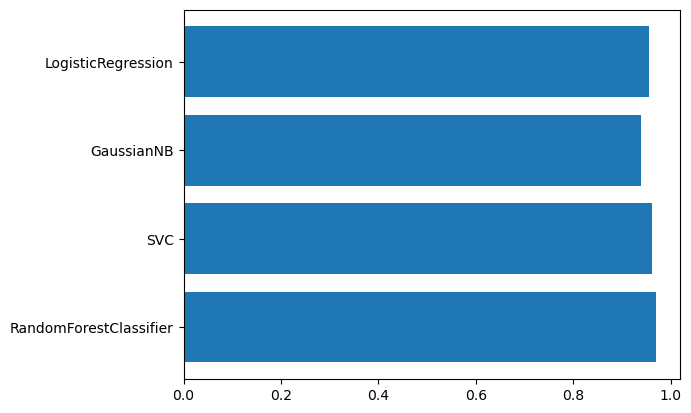

In [43]:
from matplotlib import pyplot as plt
plt.barh(cv_df['model_name'],cv_df['accuracy'])

## 4. The modern way

In [19]:
models = {
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVM': SVC()
}
params = { 
    'LogisticRegression': { 'C': [0.1, 1, 2] },
    'RandomForestClassifier': { 'n_estimators': [50,200, 300,400,500]},
    'SVM' : {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[0.001,0.01,1,10]}
}


In [20]:
from HyperclassifierSearch import HyperclassifierSearch
search = HyperclassifierSearch(models, params)
best_model = search.train_model(X_train, y_train, cv=5)

Search for LogisticRegression ...
Search for RandomForestClassifier ...
Search for SVM ...
Search is done.


In [21]:
search.evaluate_model()


results round for: LogisticRegression
results round for: RandomForestClassifier
results round for: SVM


,Estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,RandomForestClassifier,{'n_estimators': 200},0.9625,0.9500,0.9750,0.962025,0.974684,0.964842,0.009314
1,RandomForestClassifier,{'n_estimators': 400},0.9625,0.9500,0.9625,0.962025,0.962025,0.959810,0.004910
2,RandomForestClassifier,{'n_estimators': 50},0.9250,0.9375,0.9750,0.987342,0.962025,0.957373,0.023123
3,LogisticRegression,{'C': 2},0.9625,0.9625,0.9375,0.962025,0.962025,0.957310,0.009907
4,RandomForestClassifier,{'n_estimators': 300},0.9500,0.9500,0.9625,0.962025,0.962025,0.957310,0.005971
5,RandomForestClassifier,{'n_estimators': 500},0.9625,0.9375,0.9625,0.962025,0.962025,0.957310,0.009907
6,SVM,"{'C': 0.01, 'kernel': 'linear'}",0.9750,0.9375,0.9250,0.962025,0.974684,0.954842,0.020213
7,LogisticRegression,{'C': 1},0.9625,0.9375,0.9375,0.962025,0.949367,0.949778,0.011077
8,SVM,"{'C': 10, 'kernel': 'linear'}",0.9500,0.9375,0.9375,0.962025,0.949367,0.947278,0.009170
9,LogisticRegression,{'C': 0.1},0.9625,0.9250,0.9375,0.962025,0.949367,0.947278,0.014460


In [14]:
result = search.evaluate_model()
result.shape

results round for: LogisticRegression
results round for: RandomForestClassifier
results round for: SVM


(24, 9)

In [15]:
result['label'] = result['Estimator'].astype(str) + result['params'].astype(str)


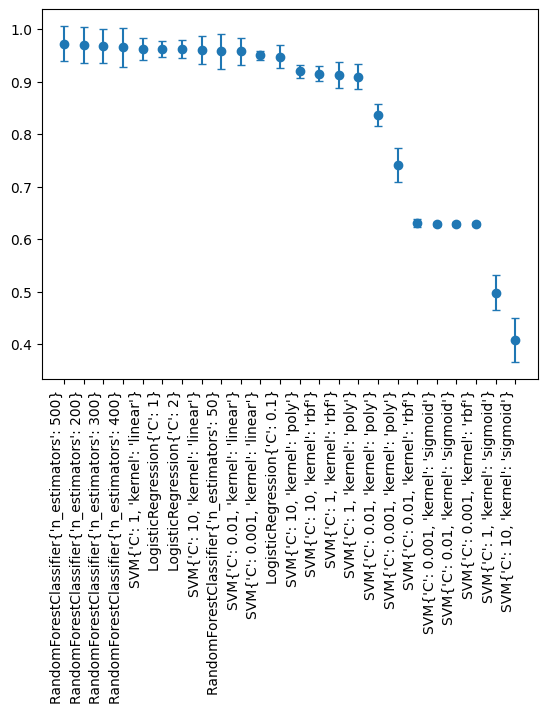

In [17]:
from matplotlib import pyplot as plt
std = result['std_test_score'].to_list()
mean_ = result['mean_test_score'].to_list()
x = result['label'].to_list()
plt.errorbar(x, mean_, std, linestyle='None', marker='o',capsize=3)
plt.xticks(rotation=90, ha='right')

plt.show()

# 4. What if we want to do some random search with different metrics?

In [89]:
best_model = search.train_model(X_train, y_train, search='random', scoring='roc_auc', cv=5)
search.evaluate_model()

Search for LogisticRegression ...


C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Search for RandomForestClassifier ...


C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Search for SVM ...
Search is done.
results round for: LogisticRegression
results round for: RandomForestClassifier
results round for: SVM


,Estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,SVM,"{'kernel': 'linear', 'C': 1}",0.996000,0.986000,0.980667,0.996552,1.000000,0.991844,0.007281
1,LogisticRegression,{'C': 2},0.996000,0.982667,0.981333,0.994483,1.000000,0.990897,0.007496
2,LogisticRegression,{'C': 1},0.996000,0.981333,0.980000,0.994483,1.000000,0.990363,0.008131
3,SVM,"{'kernel': 'linear', 'C': 10}",0.998000,0.986667,0.974667,0.993103,0.996552,0.989798,0.008516
4,SVM,"{'kernel': 'linear', 'C': 0.01}",0.995333,0.981333,0.982000,0.990345,0.998621,0.989526,0.006941
5,LogisticRegression,{'C': 0.1},0.994667,0.980000,0.978000,0.991034,0.999310,0.988602,0.008292
6,RandomForestClassifier,{'n_estimators': 500},0.986667,0.980667,0.974667,1.000000,1.000000,0.988400,0.010203
7,RandomForestClassifier,{'n_estimators': 300},0.982000,0.982333,0.975333,1.000000,1.000000,0.987933,0.010164
8,RandomForestClassifier,{'n_estimators': 50},0.981333,0.976000,0.980333,1.000000,1.000000,0.987533,0.010336
9,RandomForestClassifier,{'n_estimators': 200},0.981333,0.982333,0.974000,1.000000,1.000000,0.987533,0.010578


In [66]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

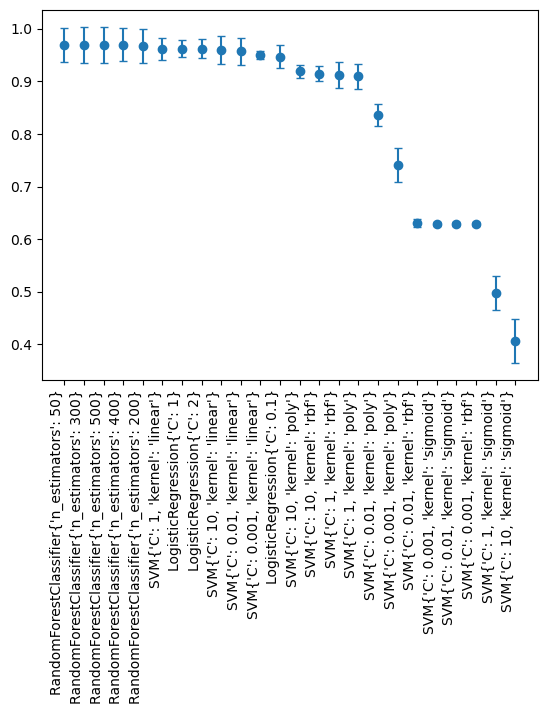

In [90]:
std = result['std_test_score'].to_list()
mean_ = result['mean_test_score'].to_list()
x = result['label'].to_list()
plt.errorbar(x, mean_, std, linestyle='None', marker='o',capsize=3)
plt.xticks(rotation=90, ha='right')

plt.show()

### Build with The best model

In [178]:
clf = SVC(kernel='linear')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

In [179]:
clf.fit(X_train_new,y_train)

SVC(kernel='linear')

In [180]:
preds = clf.predict(X_test_new)
from sklearn.metrics import classification_report as report
print(report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.9677    0.9375    0.9524        64
           1     0.9633    0.9813    0.9722       107

    accuracy                         0.9649       171
   macro avg     0.9655    0.9594    0.9623       171
weighted avg     0.9650    0.9649    0.9648       171



## What Happens if we use PCA? with p=20?

In [181]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_new)

In [182]:
## transform the test data into PCs
X_test_pca = pca.transform(X_test_new)

In [183]:
X_train_pca.shape

(398, 20)

In [184]:
X_test_pca.shape

(171, 20)

In [185]:
clf = SVC(kernel='linear')
clf.fit(X_train_pca,y_train)
preds = clf.predict(X_test_pca)
from sklearn.metrics import classification_report as report
print(report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.9836    0.9375    0.9600        64
           1     0.9636    0.9907    0.9770       107

    accuracy                         0.9708       171
   macro avg     0.9736    0.9641    0.9685       171
weighted avg     0.9711    0.9708    0.9706       171



### What happens if we want to get 0.98 = 98% of total variance explained

In [186]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.98)
X_train_pca = pca.fit_transform(X_train_new)

In [187]:
X_test_pca = pca.transform(X_test_new)

In [188]:
X_test_pca.shape

(171, 14)

In [189]:
X_test.shape

(171, 30)

In [190]:
clf = SVC(kernel='linear')
clf.fit(X_train_pca,y_train)
preds = clf.predict(X_test_pca)
from sklearn.metrics import classification_report as report
print(report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.9677    0.9375    0.9524        64
           1     0.9633    0.9813    0.9722       107

    accuracy                         0.9649       171
   macro avg     0.9655    0.9594    0.9623       171
weighted avg     0.9650    0.9649    0.9648       171



Text(0, 0.5, '% total variance explained')

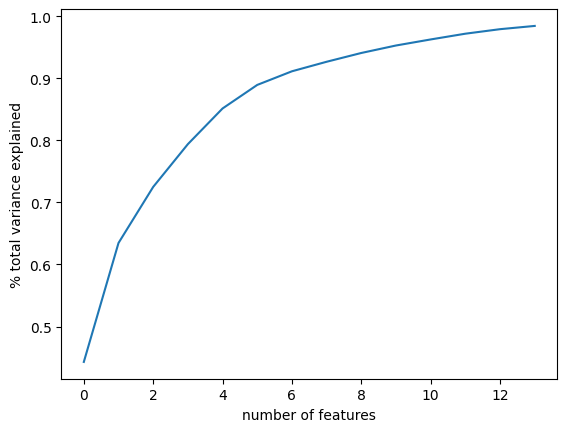

In [191]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of features")
plt.ylabel("% total variance explained")

In [193]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_new)
X_test_pca = pca.transform(X_test_new)
clf = SVC(kernel='linear')
clf.fit(X_train_pca,y_train)
preds = clf.predict(X_test_pca)
from sklearn.metrics import classification_report as report
print(report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.9672    0.9219    0.9440        64
           1     0.9545    0.9813    0.9677       107

    accuracy                         0.9591       171
   macro avg     0.9609    0.9516    0.9559       171
weighted avg     0.9593    0.9591    0.9589       171



In [140]:
pca.explained_variance_

array([13.323683  ,  5.76233456,  2.71628588,  2.07262022,  1.72765536,
        1.14107795,  0.65997935,  0.46159548,  0.4257426 ,  0.3620996 ,
        0.29335366,  0.27837074,  0.21905656,  0.15766178])

### What happens if we use Random projection?

In [194]:
from sklearn.random_projection import GaussianRandomProjection
randompj = GaussianRandomProjection(n_components=20)
X_train_pca = randompj.fit_transform(X_train_new)
X_test_pca = randompj.transform(X_test_new)
clf = SVC(kernel='linear')
clf.fit(X_train_pca,y_train)
preds = clf.predict(X_test_pca)
from sklearn.metrics import classification_report as report
print(report(y_test,preds,digits=4))

              precision    recall  f1-score   support

           0     0.9677    0.9375    0.9524        64
           1     0.9633    0.9813    0.9722       107

    accuracy                         0.9649       171
   macro avg     0.9655    0.9594    0.9623       171
weighted avg     0.9650    0.9649    0.9648       171

